## look at snow climatology for 1958 and earlier

In [ ]:
import xarray as xr
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import matplotlib.path as mpath
from pathlib import Path

In [ ]:
datadir = Path("/Users/christine/Projects/dyndowndata")
JRA55_clim= datadir / "jra55_clim/jra55_snwe_clim_1966_1985"

In [ ]:
ds = xr.open_dataset(JRA55_clim, engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (time: 366, latitude: 320, longitude: 640)
Coordinates:
  * time        (time) datetime64[ns] 1984-02-29T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo
    GRIB_subCentre:          241
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo
    history:                 2024-09-11T19:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds.sd.mean()

<xarray.DataArray 'sd' ()>
array(50.1741, dtype=float32)
Coordinates:
    step     timedelta64[ns] ...
    surface  float64 ...

In [ ]:
cmap = plt.get_cmap('Blues', 6)

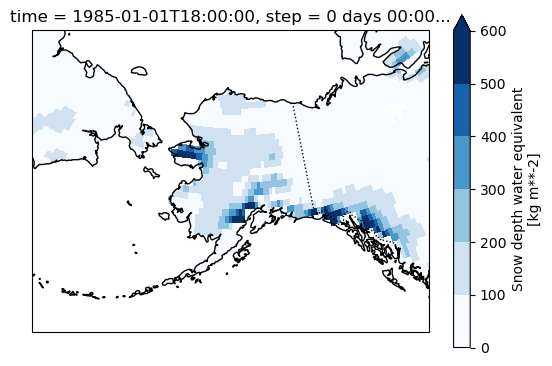

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds.sd.isel(time=1).plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)


In [ ]:
mydataarray = ds.sd.isel(time=1)

In [ ]:
# set up projection and axes
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.coastlines()


xlim = [-180, -125]
ylim = [50, 75]
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)


# ax.add_feature(cf.BORDERS, linestyle=':')
mydataarray.plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
gl = ax.gridlines(draw_labels=True,  linestyle='--')
#to avoid further clipping
ax.set_extent([xlim[0], xlim[1], ylim[0]-5, ylim[1]])

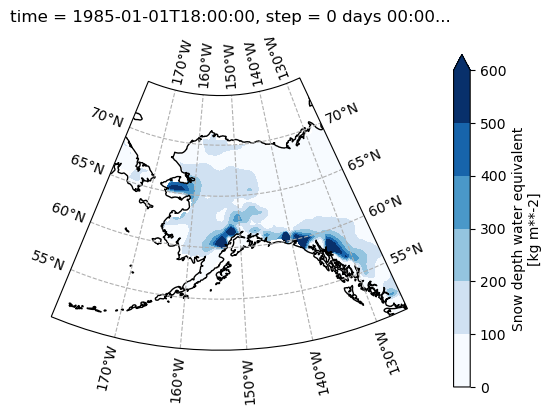

In [ ]:
# set up projection and geoaxes
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.coastlines()

# set up plot area
xlim = [-180, -125]
ylim = [50, 75]
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)

# transform extent to projection
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)

# plot the data
mydataarray.plot.contourf(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)

# add additional features and corrections
# ax.add_feature(cf.BORDERS, linestyle=':')
gl = ax.gridlines(draw_labels=True,  linestyle='--')
ax.set_extent([xlim[0], xlim[1], ylim[0]-5, ylim[1]]) #to avoid further clipping

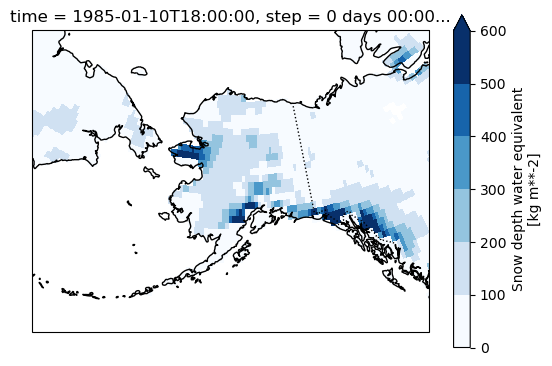

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
ds.sd.isel(time=10).plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)

In [ ]:
ds.time

<xarray.DataArray 'time' (time: 366)>
array(['1984-02-29T18:00:00.000000000', '1985-01-01T18:00:00.000000000',
       '1985-01-02T18:00:00.000000000', ..., '1985-12-29T18:00:00.000000000',
       '1985-12-30T18:00:00.000000000', '1985-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 1984-02-29T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time